In [1]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn.functional as F
from torch import nn
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pprint import pprint
from sklearn.decomposition import PCA

In [2]:
torch.__version__

'2.5.0+cpu'

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [4]:
import re

# Sample line of text to demonstrate
line = "Hello! Welcome to AI-era @2024."

# Remove everything except alphanumeric characters, spaces, and full-stop
line = re.sub(r'[^a-zA-Z0-9 .]', '', line).lower()

print(line)


hello welcome to aiera 2024.


In [5]:
import re
import csv

# Load the dataset
with open('dataset.txt', 'r') as file:
    data = file.read()

# Remove special characters except alphanumeric, space, and full-stop
data = re.sub(r'[^a-zA-Z0-9 .]', '', data)
data = data.lower()

# Split data into sentences based on full stops
sentences = data.split('.')

# Remove whitespace form start and end from sentences
sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

print(sentences[:20], '\n', type(sentences))
print(len(sentences))

['first citizenbefore we proceed any further hear me speak', 'allspeak speak', 'first citizenyou are all resolved rather to die than to famishallresolved', 'resolved', 'first citizenfirst you know caius marcius is chief enemy to the people', 'allwe knowt we knowt', 'first citizenlet us kill him and well have corn at our own price', 'ist a verdictallno more talking ont let it be done away awaysecond citizenone word good citizens', 'first citizenwe are accounted poor citizens the patricians good', 'what authority surfeits on would relieve us if theywould yield us but the superfluity while it werewholesome we might guess they relieved us humanelybut they think we are too dear the leanness thatafflicts us the object of our misery is as aninventory to particularise their abundance oursufferance is a gain to them let us revenge this withour pikes ere we become rakes for the gods know ispeak this in hunger for bread not in thirst for revenge', 'second citizenwould you proceed especially again

In [6]:
# Take a small dataset
sentences = sentences[:500]

In [7]:
words = sorted(list(set(" ".join(sentences).split())))
len(words)

3472

In [8]:
stoi = {s:i+1 for i,s in enumerate(words)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
# pprint(itos)

In [9]:
import torch


context_size = 5  # Number of words in the input sequence
X, Y = [], []
count =0

for sent in sentences[:]:
    words = sent.split()
    words.append(".")
    context = [0]*context_size
    
    for word in words:
        ix = stoi[word]
        X.append(context.copy())
        Y.append(ix)
        count+=1
        print(f"{count  }",' '.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X).to(device)
Y = torch.tensor(Y).to(device)
print(X.shape, Y.shape)

1 . . . . . ---> first
2 . . . . first ---> citizenbefore
3 . . . first citizenbefore ---> we
4 . . first citizenbefore we ---> proceed
5 . first citizenbefore we proceed ---> any
6 first citizenbefore we proceed any ---> further
7 citizenbefore we proceed any further ---> hear
8 we proceed any further hear ---> me
9 proceed any further hear me ---> speak
10 any further hear me speak ---> .
11 . . . . . ---> allspeak
12 . . . . allspeak ---> speak
13 . . . allspeak speak ---> .
14 . . . . . ---> first
15 . . . . first ---> citizenyou
16 . . . first citizenyou ---> are
17 . . first citizenyou are ---> all
18 . first citizenyou are all ---> resolved
19 first citizenyou are all resolved ---> rather
20 citizenyou are all resolved rather ---> to
21 are all resolved rather to ---> die
22 all resolved rather to die ---> than
23 resolved rather to die than ---> to
24 rather to die than to ---> famishallresolved
25 to die than to famishallresolved ---> .
26 . . . . . ---> resolved
27 . . . . re

In [10]:
for i in range(10):
    print(X[i]," :: ", Y[i])

tensor([0, 0, 0, 0, 0])  ::  tensor(1075)
tensor([   0,    0,    0,    0, 1075])  ::  tensor(539)
tensor([   0,    0,    0, 1075,  539])  ::  tensor(3272)
tensor([   0,    0, 1075,  539, 3272])  ::  tensor(2300)
tensor([   0, 1075,  539, 3272, 2300])  ::  tensor(147)
tensor([1075,  539, 3272, 2300,  147])  ::  tensor(1172)
tensor([ 539, 3272, 2300,  147, 1172])  ::  tensor(1328)
tensor([3272, 2300,  147, 1172, 1328])  ::  tensor(1821)
tensor([2300,  147, 1172, 1328, 1821])  ::  tensor(2720)
tensor([ 147, 1172, 1328, 1821, 2720])  ::  tensor(0)


In [11]:
emb_dim = 32
emb = nn.Embedding(len(stoi), emb_dim)

# Convert context to tensor
context_sample = torch.tensor(X[4])

# Pass it through the embedding layer
context_embedded = emb(context_sample)

print("Original context:", context_sample)
print("Embedded context:", context_embedded)

Original context: tensor([   0, 1075,  539, 3272, 2300])
Embedded context: tensor([[-2.7123e-01,  9.8944e-01, -1.7353e+00, -2.3479e+00,  1.6424e+00,
         -7.0069e-01, -1.3467e+00,  4.0307e-01,  7.2355e-01,  1.7999e+00,
          2.5320e-01, -5.4478e-01, -9.4669e-01, -1.3772e+00,  9.2230e-01,
         -6.6377e-01,  2.9723e-02, -4.6816e-01,  3.6493e+00,  4.3350e-01,
          5.1554e-01, -1.4300e+00, -8.3430e-01,  8.6233e-01,  5.4733e-02,
          5.3905e-01, -2.3946e+00, -6.7620e-01,  4.1291e-01,  1.6638e-01,
          9.3085e-01,  1.4705e+00],
        [ 4.3683e-02,  7.0049e-01,  3.4814e-01,  7.5881e-01, -6.0768e-01,
          2.0453e-01, -9.1907e-01, -2.7739e-01,  3.3905e-01, -4.9950e-01,
         -1.3971e+00,  5.3006e-01, -1.3224e-02,  5.7107e-01,  2.0323e+00,
          1.4865e+00,  3.4068e-02,  1.0278e+00, -5.5608e-02, -1.3001e+00,
         -2.0238e+00, -7.7396e-02, -6.6871e-01, -4.7441e-01, -1.8992e-01,
         -2.0028e+00,  6.5713e-01, -5.2504e-01,  1.0185e+00,  1.8707e-01,
 

C:\Users\Asus\AppData\Local\Temp\ipykernel_15752\3077565227.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  context_sample = torch.tensor(X[4])


In [12]:
import torch.nn as nn
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


embeddings = emb.weight.detach().numpy()

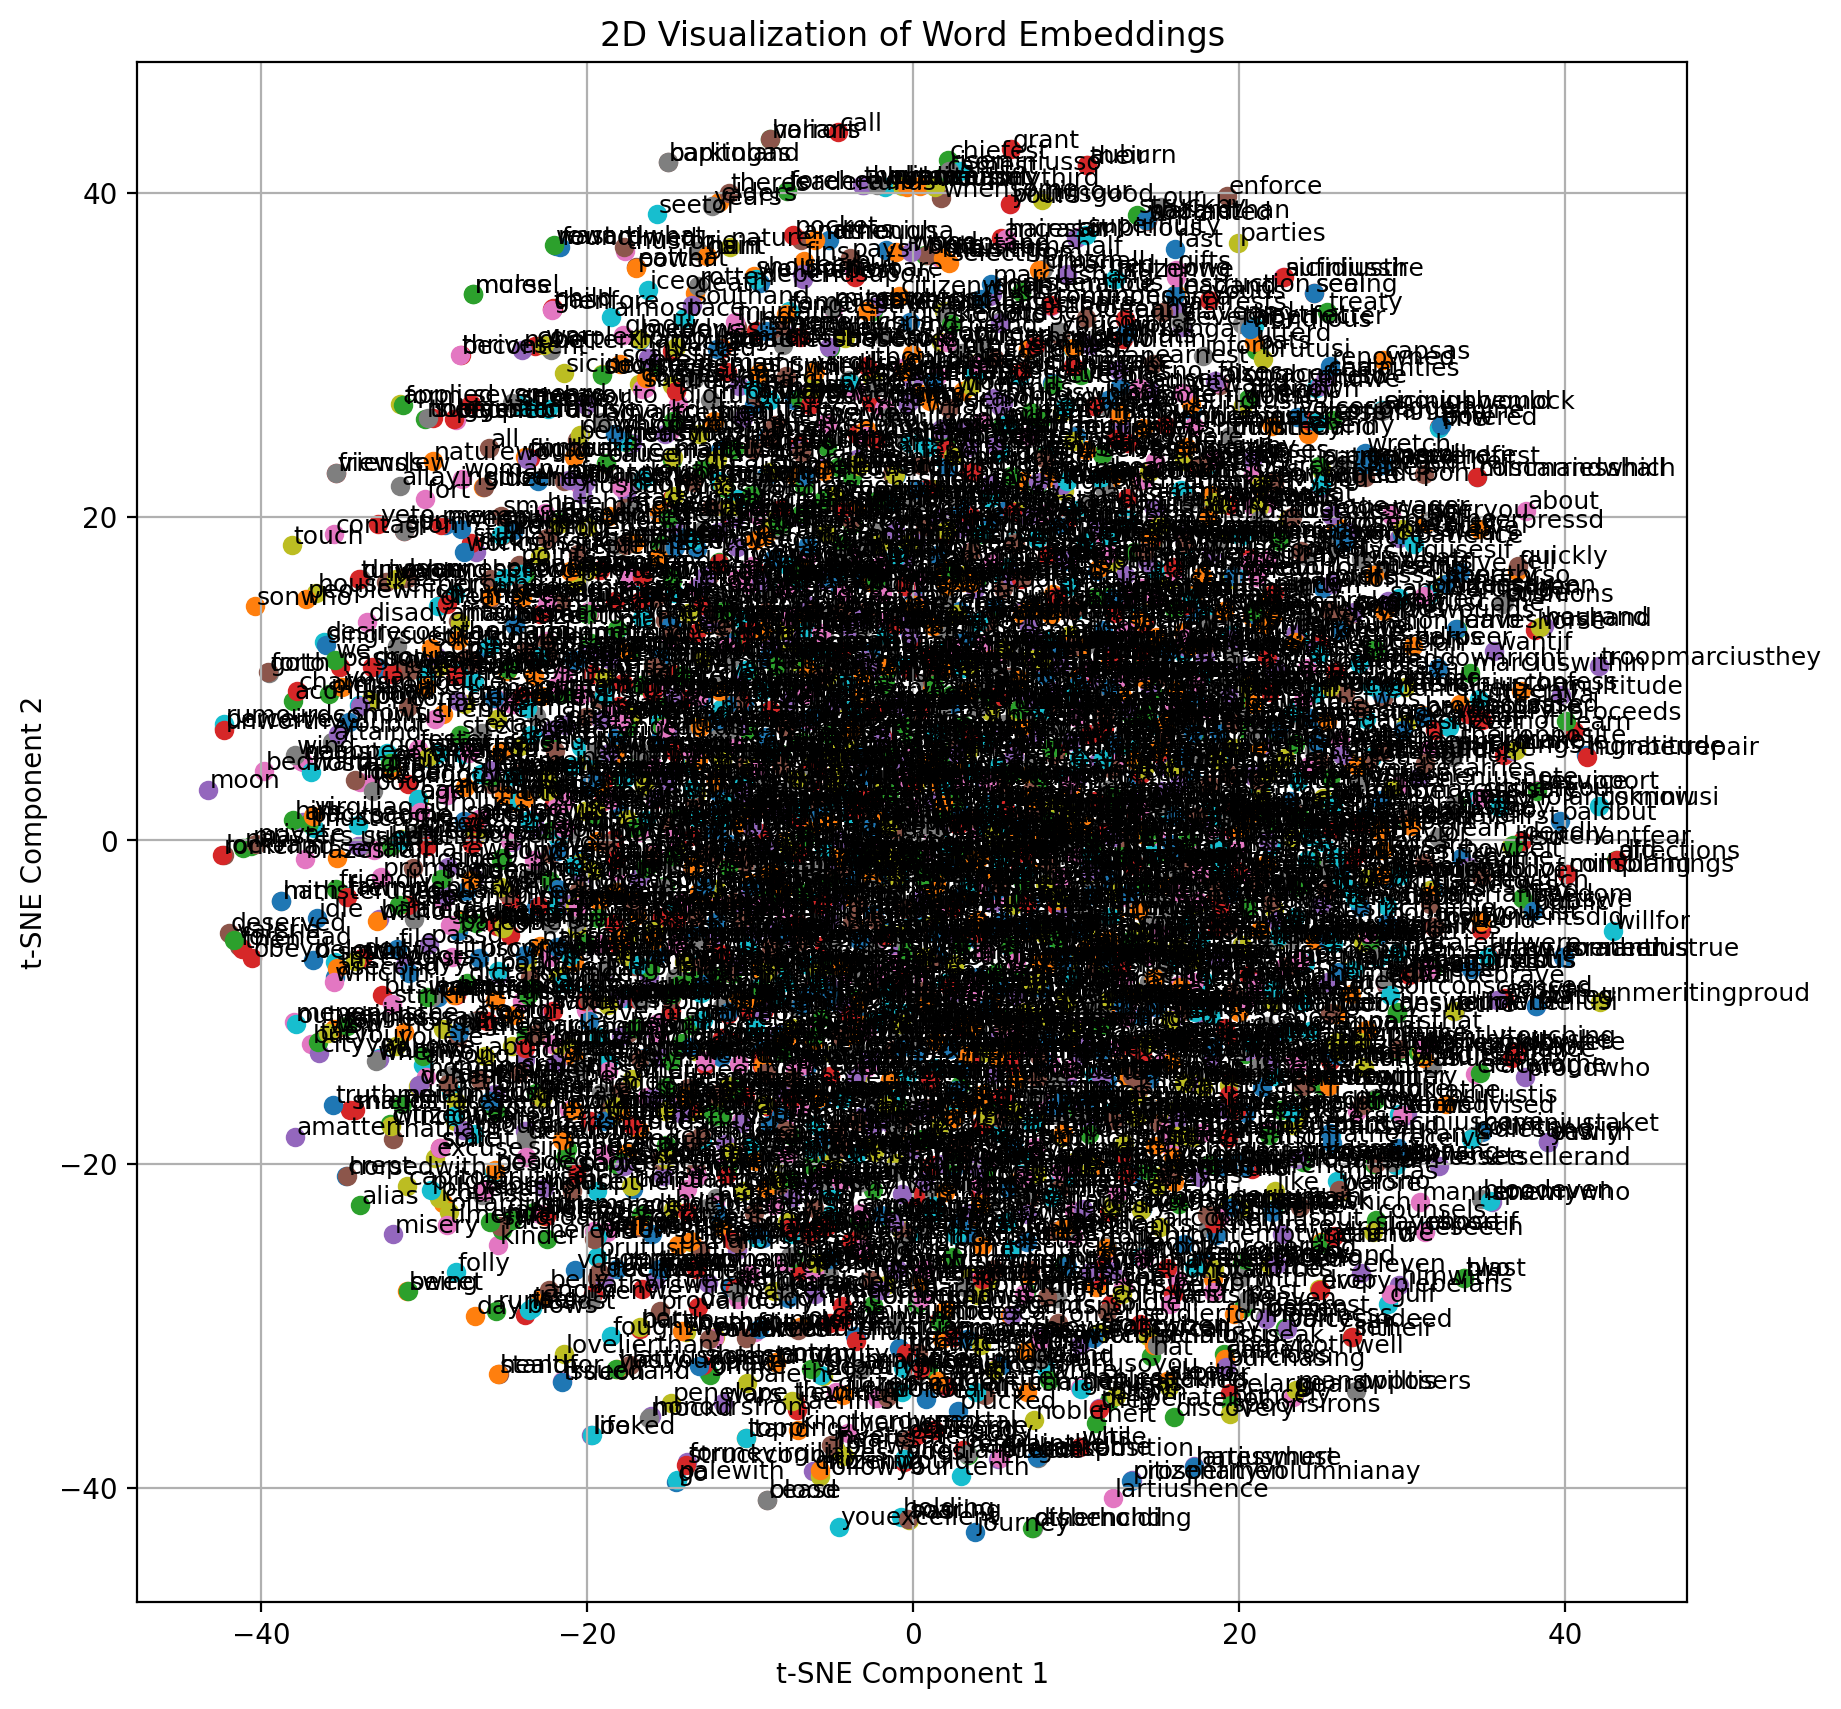

In [27]:


# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2)
embeddings_2d = tsne.fit_transform(embeddings)

# Prepare vocabulary labels
vocab = [itos[i] for i in range(len(stoi))]  # Create vocabulary from indices

# Plot the embeddings
plt.figure(figsize=(10, 10))
for i, label in enumerate(vocab):
    x, y = embeddings_2d[i]
    plt.scatter(x, y)  # Scatter plot for the embeddings
    plt.text(x + 0.1, y + 0.1, label, fontsize=9)  # Add label next to each point

plt.title("2D Visualization of Word Embeddings")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid()
plt.show()


In [13]:
import torch.nn as nn
import torch.optim as optim

class NextWordPredictor(nn.Module):
    def __init__(self, vocab_size, emb_dim, hidden_size, context_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, emb_dim)
        self.fc1 = nn.Linear(context_size * emb_dim, hidden_size)
        self.fc2 = nn.Linear(hidden_size, vocab_size)
    
    def forward(self, x):
        x = self.embedding(x)  # Embedding lookup
        x = x.view(x.size(0), -1)  # Flatten the embeddings
        x = torch.relu(self.fc1(x))  # First fully connected layer
        x = self.fc2(x)  # Output layer (vocab size)
        return x



In [15]:
import torch.nn as nn
import torch.optim as optim

# Create the model instance
context_size = 5  # Number of words in the input sequence
emb_dim = 32  # Dimension of word embeddings
hidden_size = 1024  # Size of the hidden layer
model = NextWordPredictor(len(stoi), emb_dim, hidden_size, context_size).to(device)

# Seed for reproducibility
g = torch.Generator()
g.manual_seed(4000002)

# Function to generate text based on the model
def generate_text(model, itos, stoi, context_size, context, max_len=10 ):
    # Initialize the context with zeros
    # Start with a context of padding tokens
    generated_text = ''
    
    for _ in range(max_len):
        x = torch.tensor(context).view(1, -1).to(device)  # Prepare input
        y_pred = model(x)  # Get model predictions
        
        # Sample the next word index from the predicted probabilities
        ix = torch.distributions.categorical.Categorical(logits=y_pred).sample().item()
        word = itos[ix]  # Convert index to word
        
        if word == '.':
            break  # Stop if the end of the sentence is generated
        
        generated_text += word + ' '  # Append the generated word to the output
        context = context[1:] + [ix]  # Update context by removing the oldest word and adding the new one

    return generated_text.strip()  # Return the generated text

# Generate sample names or sentences
context = [0] * context_size
for i in range(10):
    print(generate_text(model, itos, stoi, context_size, context))


contemn weal hairas enemies againstyour brief allthe leg showd smilewhich
wishesand alias pleasedto heaven grainto needless tried amore scourge memory
taunts besides beastlyplebeians attaind ingalen were graceful tis accused citywe
worth crush strength wheelthree besides citizenbut drovethe friend seekingmeneniusfor sons
sewing theymeneniuswhat fightwhen dote marciushang poorsuitors basest aidless cat heelswith
bout gown limitation imperfect marciuso cominiusour senatorthen his willsa meneniushe
breast competencywhereby sink venture thrice parasites yonderthat powers aufidiusthat senator
theywould ceremony featswhen drop infect barm wedged tongues belarge schoolmaster
giddy offthere citizenbut worshipful againrepair onecoriolanus toyour tituscominiusnoble bats remembera
malice ignorant stuff doit kindest virgiliaa survey degrees belly since


In [16]:
X.size(0)

10824

In [17]:
for param_name, param in model.named_parameters():
    print(param_name, param.shape)

embedding.weight torch.Size([3473, 32])
fc1.weight torch.Size([1024, 160])
fc1.bias torch.Size([1024])
fc2.weight torch.Size([3473, 1024])
fc2.bias torch.Size([3473])


In [18]:
X.shape

torch.Size([10824, 5])

In [20]:
# Train the model

loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.AdamW(model.parameters(), lr=0.01)
import time
# Mini-batch training
batch_size = 1024
print_every = 10
elapsed_time = []
for epoch in range(800):
    start_time = time.time()
    for i in range(0, X.shape[0], batch_size):
        x = X[i:i+batch_size]
        y = Y[i:i+batch_size]
        y_pred = model(x)
        loss = loss_fn(y_pred, y)
        loss.backward()
        opt.step()
        opt.zero_grad()
    end_time = time.time()
    elapsed_time.append(end_time - start_time)
    if epoch % print_every == 0:
        print(epoch, loss.item())

0 0.187250018119812
10 0.15968887507915497
20 0.1570587307214737
30 0.15915919840335846
40 0.15656985342502594
50 0.15649458765983582
60 0.15649794042110443
70 0.1566084623336792
80 0.1564197987318039
90 0.15669961273670197
100 0.15660059452056885
110 0.15653689205646515
120 0.15643930435180664
130 0.15664471685886383
140 0.15638898313045502
150 0.15657660365104675
160 0.15634112060070038
170 0.15649370849132538
180 0.15665648877620697
190 0.1564546674489975
200 0.156633660197258
210 0.15646247565746307
220 0.15656208992004395
230 0.15662582218647003
240 0.15648451447486877
250 0.15646441280841827
260 0.1564522087574005
270 0.1564694494009018
280 0.15653420984745026
290 0.15645840764045715
300 0.15646934509277344
310 0.1564457267522812
320 0.15664783120155334
330 0.1826518476009369
340 0.15645873546600342
350 0.15649603307247162
360 0.15655121207237244
370 0.1565243899822235
380 0.15650039911270142
390 0.15645405650138855


KeyboardInterrupt: 

In [21]:
elapsed_time[:10]

[4.523754835128784,
 4.477532148361206,
 4.628192186355591,
 4.590513706207275,
 4.5789878368377686,
 4.601994276046753,
 4.3885438442230225,
 4.37978196144104,
 4.331324815750122,
 4.888114929199219]

In [16]:
# Save the model

import torch

# Save the model's state dictionary
torch.save(model.state_dict(), "next_word_predictor.pth")


In [19]:
# load the model

model.load_state_dict(torch.load("next_word_predictor.pth"))
model.eval()

C:\Users\Asus\AppData\Local\Temp\ipykernel_15752\3748149503.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("next_word_predictor.pth"))


NextWordPredictor(
  (embedding): Embedding(3473, 32)
  (fc1): Linear(in_features=160, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=3473, bias=True)
)

In [20]:
def predict_next_words(text, k):
    # Split text into words, keep last 5 if there are more than 5 words
    words = text.lower().split()[-5:] if len(text.split()) > 5 else text.lower().split()
    
    print("Input Text:", words)
    
    context_size = 5
    context = [0] * context_size
    
    # Collect valid words indices using stoi
    valid_words = [stoi[word] for word in words if word in stoi]
    
    # Update context with valid words
    for i in range(context_size - len(valid_words), context_size):
        context[i] = valid_words[i - (context_size - len(valid_words))]
        
    print("Filled Context:", context)
    
    # Generate and print the predicted words
    prediction = generate_text(model, itos, stoi, context_size, context, k)
    print("Predicted Words:", prediction)





In [21]:
# Example usage:
text ="Enter your sample input text here"
k = 10
predict_next_words(text,k)

Input Text: ['your', 'sample', 'input', 'text', 'here']
Filled Context: [0, 0, 0, 3451, 1371]
Predicted Words: come more voices


In [ ]:
text = input("Enter the text : ")
k = int(input("How many words do you wanna predict? :"))


In [ ]:
predict_next_words(text,k)

In [24]:
# Extract and visualize trained embeddings
trained_embeddings = model.embedding.weight.data.cpu().numpy()
tsne_trained = TSNE(n_components=2, random_state=42)
trained_embeddings_2d = tsne_trained.fit_transform(trained_embeddings)


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
 

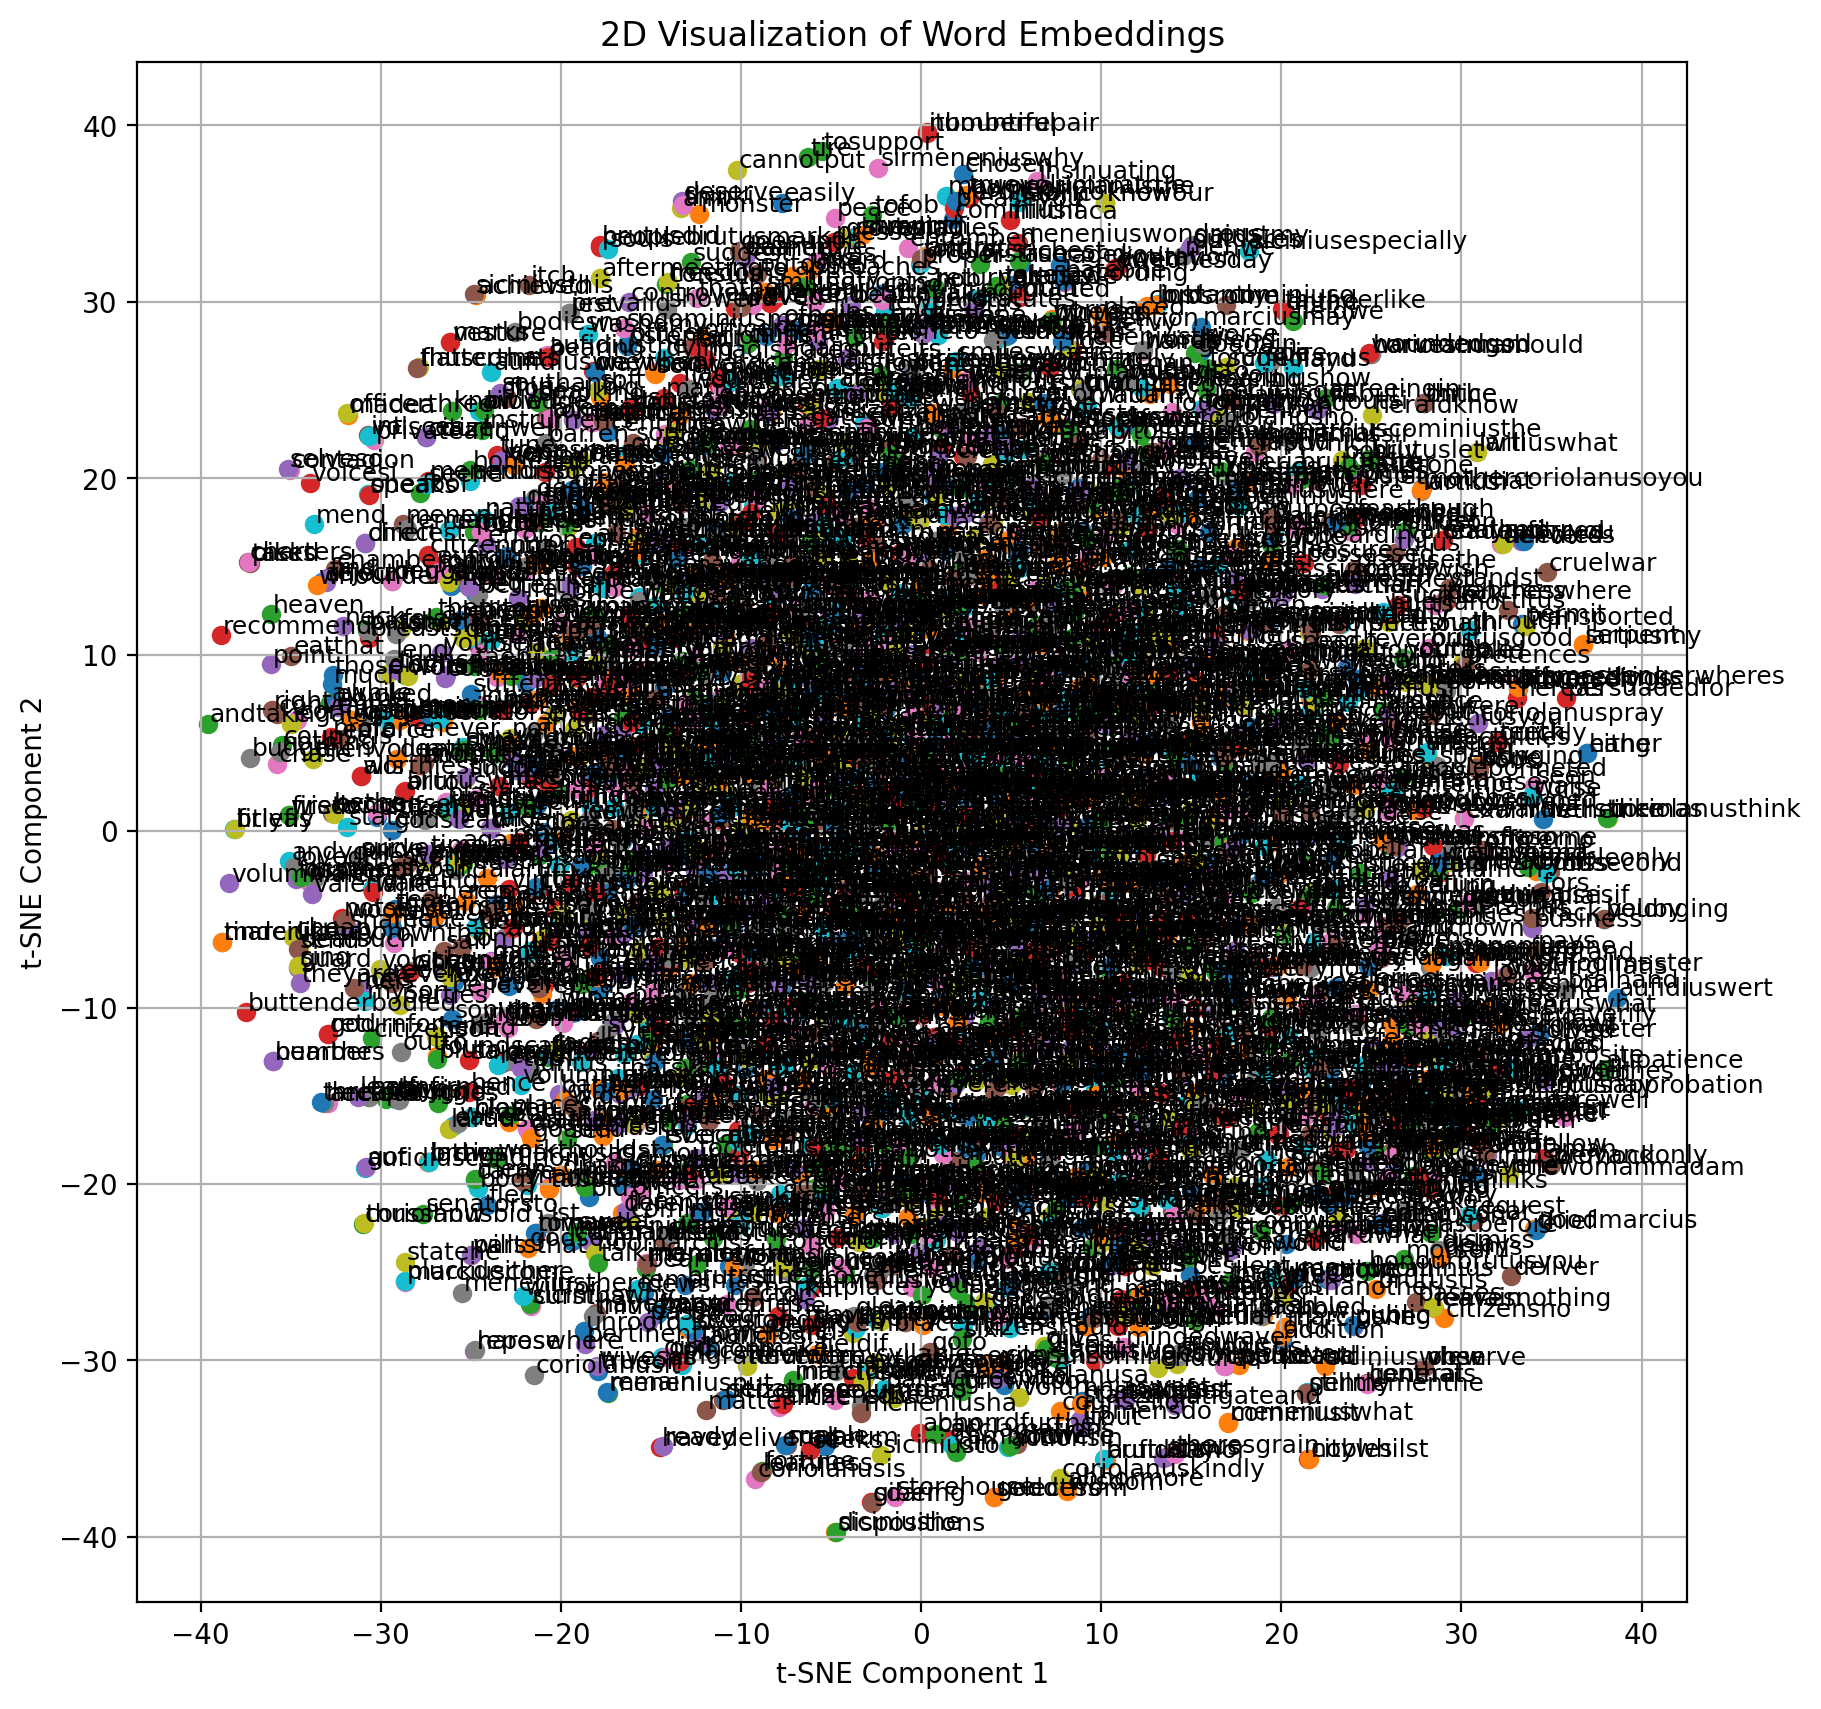

In [26]:
vocab = [itos[i] for i in range(len(stoi))]  # Create vocabulary from indices

# Plot the embeddings
plt.figure(figsize=(10, 10))
for i, label in enumerate(vocab):
    x, y = trained_embeddings_2d[i]
    plt.scatter(x, y)  # Scatter plot for the embeddings
    plt.text(x + 0.1, y + 0.1, label, fontsize=9)  # Add label next to each point

plt.title("2D Visualization of Word Embeddings")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid()
plt.show()